In [1]:
import numpy as np
import pickle as pk
import matplotlib.pyplot as pl

%matplotlib inline



In [163]:
def setup_hod(hmass, nbar=4e-4, satfrac=0.2, bs=1000, alpha_fid=0.7, sigma_lgM=0.2):
    if nbar != 0.:
        # hmass = halos['lgmass']
        numdhalos = len(hmass)/bs**3
        numhalos_nbarf = int(nbar * bs**3 * (1-satfrac))
        print("Halo number density and halo fraction used : ",numdhalos/1e-4, numhalos_nbarf/hmass.size)
        #raise Exception if (numhalos_nbarf/hmass.size) # diagnostics if number of halos < number density
        #
        mcut = hmass[:numhalos_nbarf][-1]
        nsat = satfrac * nbar * bs**3
        mdiff = (hmass - mcut + mcut*1e-3)[:numhalos_nbarf] ** alpha_fid
        msum = mdiff.sum()/nsat
        m1 = msum**(1/alpha_fid)
        print(np.log10(mcut))
        # mcut = 10**(np.log10(mcut))  ##offset by log_sigma/2 to account for scatter
        print("mcut, M1 : ", np.log10(mcut), np.log10(m1))
    else: mcut, m1 = 10**13., 10**13.9
    return mcut, m1





In [172]:
test_id = 1
df = pk.load(open(f'/mnt/ceph/users/spandey/CHARM/data/halo_cats_charm_truth/halo_cat_pos_vel_LH_{test_id}.pk','rb'))
lgmass_truth = df['lgmass_truth']

lgmass_truth_sort = np.flip(np.sort(lgmass_truth))

sigma_lgM = 0.3
alpha_sat = 0.76
nbar = 4e-4
sat_frac = 0.2
mcut, m1 = setup_hod(10**lgmass_truth_sort, nbar=nbar, satfrac=sat_frac, bs=1000, alpha_fid=alpha_sat, sigma_lgM=sigma_lgM)




Halo number density and halo fraction used :  4.206169999999999 0.7607871293837386
12.807109
mcut, M1 :  12.807109 13.808942145116022


In [173]:
# satfrac = 0.2
# bs = 1000
# nbar = 4e-4
# numdhalos = len(lgmass_truth_sort)/bs**3
# numhalos_nbarf = int(nbar * bs**3 * (1-satfrac))
# mcut = 10**lgmass_truth_sort[:numhalos_nbarf][-1]



In [174]:
# sigma_lgM = 0.1
# np.log10(mcut), np.log10(10**(np.log10(mcut) + sigma_lgM/2.))



In [175]:
import scipy as sp
# 'logMmin': 13.03, 
#     'sigma_logM':0.38,
#     'logM0': 13.27, 
#     'logM1': 14.08, 
#     'alpha': 0.76
sigma_lgM = sigma_lgM
# logMmin = 13.03
# logM0 = 13.27
logMmin = np.log10(mcut)
logM0 = np.log10(mcut)
m0 = 10**logM0
# logM1 = 14.08
logM1 = np.log10(m1)
m1 = 10**logM1
alpha_sat = alpha_sat

indsel = np.where(lgmass_truth_sort > np.log10(m0))[0]
ncen_gals = 0.5*(1 + sp.special.erf((lgmass_truth_sort - logMmin)/sigma_lgM))
nsat_gals = np.zeros_like(lgmass_truth_sort)
nsat_gals[indsel] = ncen_gals[indsel] * ((10**lgmass_truth_sort[indsel] - m0)/m1)**alpha_sat

ntot_gals = ncen_gals + nsat_gals
ntot_gals_density = ntot_gals/1000**3
ntot_gals_density_cumsum = np.cumsum(ntot_gals_density)
ncen_gals_density_cumsum = np.cumsum(ncen_gals/1000**3)
nsat_gals_density_cumsum = np.cumsum(nsat_gals/1000**3)



In [176]:
# np.sum(ncen_gals)/1000**3


In [177]:
# m1
# nsat_gals
# 10**lgmass_truth_sort[indsel]
# ntot_gals_density_cumsum.shape

# np.argmin(np.abs(ntot_gals_density_cumsum - 4e-4))


420616

Text(0, 0.5, '$10^4 \\times $ (Cumulative number density)')

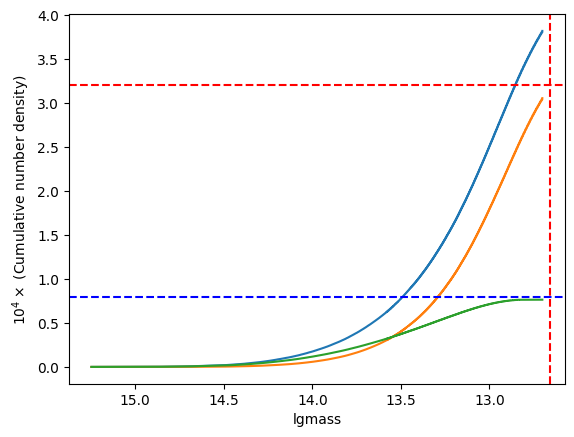

In [178]:
pl.figure()
pl.plot(lgmass_truth_sort, 1e4*ntot_gals_density_cumsum, label='ntot')
pl.plot(lgmass_truth_sort, 1e4*ncen_gals_density_cumsum, label='ncen')
pl.plot(lgmass_truth_sort, 1e4*nsat_gals_density_cumsum, label='nsat')
# flip the x-axis:
pl.gca().invert_xaxis()
pl.xlabel('lgmass')
pl.axhline(0.8*4, color='r', ls='--')
pl.axhline(0.2*4, color='b', ls='--')
pl.axvline(np.log10(mcut) - sigma_lgM/2, color='r', ls='--')
pl.ylabel(r'$10^4 \times $ (Cumulative number density)')


In [34]:
# lgmass_truth_sort


array([14.763361, 14.693947, 14.573788, ..., 12.704708, 12.704708,
       12.704708], dtype=float32)